<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_3_python_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

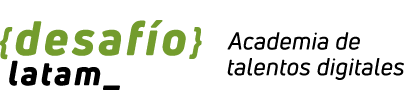

#<center><strong><font color="green">Guía de estudio - Variable aleatoria (parte I)</font></strong></center>

##<strong><font color="green">¿En qué consiste esta guía?</font></strong>
La siguiente guía de estudio tiene como objetivo practicar y ejercitar los contenidos que hemos visto en clase, además de profundizar temas adicionales que complementan aquellos vistos en la clase.

<center><strong>¡Vamos con todo!</strong></center>



## <font color='green'>Tabla de contenidos</font>

1. Analizando el índice de desarrollo humano
    - Sobre iterrows y otros métodos
2. Histograma: visualizando el comportamiento de una variable
3. La distribución normal: caracterizando nuestras variables
4. Una variable no-normal y una posible transformación
5. Una variante importante:la distribución normal estandarizada
	  - Puntajes Z
6. Variables aleatorias discretas
    -	Experimento de Bernouilli
7. Distribución binomial

<center>

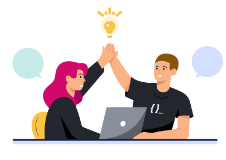

</center>

<center> <font color='green'> <strong>¡Comencemos!</strong></font> </center>



##<strong><font color="green">Analizando el índice de desarrollo humano</font></strong>

El **Índice de Desarrollo Humano** fue creado por el Programa de las Naciones Unidas para el Desarrollo buscando generar una medición alternativa para el desarrollo de un país, en oposición a las mediciones clásicas, como el crecimiento económico. Este índice es un resumen de las facilidades con las que cuenta un país para entregarle a sus habitantes una vida larga y saludable, una educación de calidad que les permita comprender su entorno y tener una vida digna, en términos generales. Para ello, por ejemplo, la dimensión de la salud se mide por la esperanza de vida al nacer. La educación, mediante el promedio de años de escolaridad en la población sobre los 25 años y la cantidad esperada de años de escolaridad en la población infantil. La dimensión del nivel de vida se mide con el producto nacional bruto per cápita. Todas estas, posteriormente, son normalizadas y promediadas. Se obtiene así un índice va entre 0 (nivel de desarrollo humano precario) a 1 (nivel de desarrollo humano perfecto).

Para poder analizar estos indicadores, primero importaremos las librerías clásicas que necesitamos para el análisis.

In [1]:
#matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# archivos con funciones de visualización
#import lec3_graphs as gfx
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos



<ipython-input-1-96d67de68d02>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn


Ahora, ingresamos la base de datos que se encuentra bajo el nombre **qog_std_cs_jan18.csv.** Mediante **shape** observamos que la tabla de datos tiene 194 filas y 1883 columnas.



In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape


(194, 1882)

In [3]:
df.head(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

df['undp_hdi'].describe().round(3)

,undp_hdi
count,186.000
mean,0.696
std,0.155
min,0.347
25%,0.567
50%,0.726
75%,0.805
max,0.948


Al ejecutar **describe en la Serie** se obtiene una media de 0.69, por lo que podemos decir que a nivel global el nivel de desarrollo está por sobre el punto de desarrollo medio (0.5). Es decir, el nivel de desarrollo mundial se acerca más a ser 'bueno'. El valor mínimo registrado es de 0.347, sustancialmente inferior a la media global, mientras que el valor máximo es de 0.948.  Hay que considerar que **describe** informa que hay 186 observaciones con valores registrados, que no concuerdan con las 194 observaciones originales.

Para obtener una lista de los países que no registran niveles de desarrollo humano, podemos hacer lo siguiente:

In [5]:
# Generamos una nueva columna que devuelve un booleano si es que la observación no está presente
df['flagnull'] = df['undp_hdi'].isnull()

df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,flagnull
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286,False
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
df['flagnull'].value_counts()

,count
flagnull,
False,186
True,8


In [7]:
for i, r in df.iterrows():
   # si flagnull es verdadero
   if r['flagnull'] is True:
       # imprime el nombre
       print(r['cname'])

# Obs: Hay una forma menos 'memory hungry' de hacer esto con el metodo 'loc' que veremos mas adelante:
df.loc[df['undp_hdi'].isnull()]['cname'].unique()

Taiwan
Korea, North
Monaco
Nauru
Marshall Islands
San Marino
Somalia
Tuvalu


array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)


La mayoría de los países corresponden a protectorados o países con situaciones de gobiernos anómalos (Dictaduras, guerras, etc), además de muchas veces no tener los suficientes recursos como para invertir en institutos de estadísticas gubernamentales.

Para excluirlos de los datos, **pandas** ofrece el método **dropna**. Este método funciona tanto en los **DataFrame** como en las Series, aunque en el primer caso debemos tener un poco más de cautela en el mecanismo de omisión de datos.

### Sobre iterrows y otros métodos

Si buscamos iterar un DataFrame con los métodos clásicos, obtendremos resultados no muy satisfactorios. Observa lo que ocurre si realizamos un **print** de los elementos contenidos en el DataFrame.


In [8]:
for i in df:
   print(i)


ccode
cname
ccodealp
ccodecow
ccodewb
version
aid_cpnc
aid_cpsc
aid_crnc
aid_crnio
aid_crsc
aid_crsio
ajr_settmort
al_ethnic
al_language
al_religion
bci_bci
bci_bcistd
bi_a_total
bi_p_total
bi_t_total
bicc_gmi
bicc_hw
bicc_milexp
bicc_milper
bs_ee
bs_h
bs_ij
bs_lma
bs_pp
bs_scnd
bs_sji_unw
bs_sji_w
bti_aar
bti_acp
bti_aod
bti_ba
bti_cdi
bti_ci
bti_cps
bti_cr
bti_csp
bti_cst
bti_ds
bti_eo
bti_eos
bti_ep
bti_epg
bti_ffe
bti_foe
bti_ic
bti_ig
bti_ij
bti_lod
bti_mes
bti_mi
bti_mo
bti_mp
bti_muf
bti_nird
bti_pdi
bti_poa
bti_pp
bti_prp
bti_ps
bti_psi
bti_rol
bti_sc
bti_sdi
bti_seb
bti_sel
bti_si
bti_sop
bti_ssn
bti_st
bti_su
bti_wr
ccp_buildsoc
ccp_cc
ccp_childwrk
ccp_civil
ccp_democ
ccp_equal
ccp_freerel
ccp_hr
ccp_infoacc
ccp_initiat
ccp_market
ccp_marriage
ccp_samesexm
ccp_slave
ccp_socialsm
ccp_strike
ccp_syst
ccp_systyear
ccp_taxes
ciri_assn
ciri_disap
ciri_dommov
ciri_elecsd
ciri_empinx_new
ciri_formov
ciri_injud
ciri_kill
ciri_physint
ciri_polpris
ciri_relfre_new
ciri_speech
ciri_tort

Por defecto, cuando ejecutamos un loop en un DataFrame este infiere que recorremos por el nombre de cada columna. Sin embargo, los DataFrames tienen métodos para especificar el tipo de loop a ejecutar.

*   **iteritems():** Instruye al loop iterar sobre un par de llaves (nombre de columna) y por los valores (elementos contenidos dentro de cada columna).

In [12]:
demo = pd.DataFrame(np.random.randn(3, 4), columns=['col1', 'col2', 'col3', 'col4'])
print(demo)

for llave, valor in demo.iteritems():
  print(llave, valor)


       col1      col2      col3      col4
0 -2.793901  0.205278 -0.325753 -0.388759
1  0.199372  0.892754  1.652692 -0.555239
2  0.612349  2.154004  1.302060  1.192714


AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [13]:
demo.head()

,col1,col2,col3,col4
0,-2.793901,0.205278,-0.325753,-0.388759
1,0.199372,0.892754,1.652692,-0.555239
2,0.612349,2.154004,1.302060,1.192714


*   **iterrows():** Instruye al loop iterar por el índice (posición de la fila en el DataFrame) en conjunto a los valores (elementos contenidos dentro de cada fila).

In [14]:
print(demo)
print('\n')
for indice, valor in demo.iterrows():
  print(indice, valor)

       col1      col2      col3      col4
0 -2.793901  0.205278 -0.325753 -0.388759
1  0.199372  0.892754  1.652692 -0.555239
2  0.612349  2.154004  1.302060  1.192714


0 col1   -2.793901
col2    0.205278
col3   -0.325753
col4   -0.388759
Name: 0, dtype: float64
1 col1    0.199372
col2    0.892754
col3    1.652692
col4   -0.555239
Name: 1, dtype: float64
2 col1    0.612349
col2    2.154004
col3    1.302060
col4    1.192714
Name: 2, dtype: float64


##<strong><font color="green">Histograma: Visualizando el comportamiento de una variable</font></strong>
Cuando buscamos visualizar cómo se comporta una variable continua, una de las formas exploratorias más comunes es mediante un histograma. Para construirlos y analizarlos en python utilizaremos **matplotlib,** una librería orientada a "hacer fáciles las cosas fáciles y posibles las cosas imposibles" mediante una sintaxis clara y concisa respecto a la forma en que se pasan argumentos y se pueden modificar gráficos. Está bien integrado con **pandas** y **numpy,** facilitando la interacción entre estos elementos.

Para generar un histograma, los valores continuos se agrupan en casillas (bins) y posteriormente se cuenta la cantidad de observaciones dentro de cada casilla. El comportamiento de matplotlib por defecto es calcular de forma automática las casillas.

Si observamos el histograma índice de desarrollo humano, en el eje X encontramos el rango de valores de la variable, y en el eje Y encontramos la frecuencia (la cantidad de repeticiones).

Existe una gran cantidad de casos con un índice de desarrollo humano igual o superior a 0.70, pero también encontramos otro grupo de observaciones con valores cercanos a 0.50.


La media del índice de desarrollo humano para nuestra muestra es de :  0.7


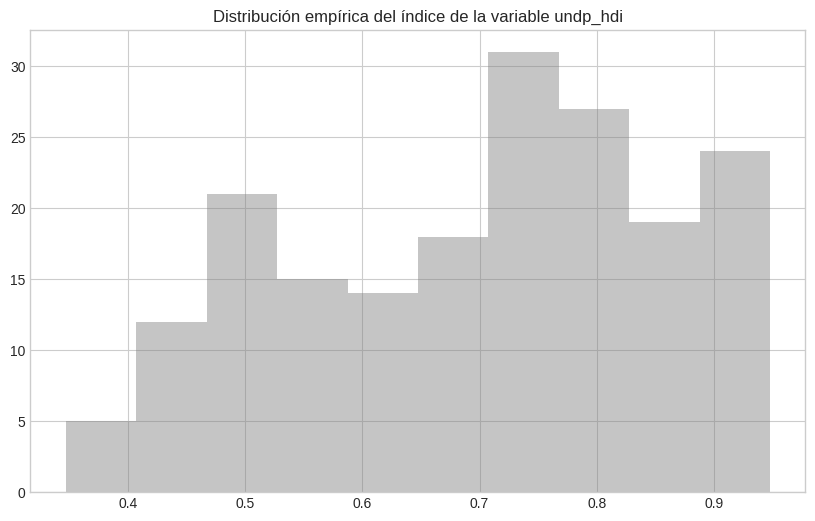

In [17]:
print("La media del índice de desarrollo humano para nuestra muestra es de : ",round(df['undp_hdi'].mean(),2))

# vamos a eliminar los datos perdidos en la columna undp_hdi con dropna()
hdi_dropna = df['undp_hdi'].dropna();
plt.hist(hdi_dropna, color='grey', alpha=0.45) #alpha nos permite graduar la transparencia del relleno
plt.title("Distribución empírica del índice de la variable undp_hdi");

Ya habiendo caracterizado la media del índice de desarrollo humano y la distribución mundial respecto de ella, estamos interesados en ver los niveles de desarrollo en distintas regiones. Para ello necesitamos calcular las medias a nivel de grupo y posteriormente graficarlas. Así, nuestra primera tarea será separar las columnas procesar en un nuevo objeto.

Para esto, Pandas dispone de los métodos **loc** (para especificar etiquetas de los ejes) e **iloc** (para especificar los índices asociados a los ejes). Esto es lo que veremos a continuación.

### Sobre loc e iloc

*  Seleccionar algunas filas y algunas columnas

<center>

dataFrame.loc[['fila1','fila2'],['columna1','columna2']]

dataFrame.iloc[[0,1,2],[2,3,4]]

</center>


*  Seleccionar algunas filas y todas las columnas

<center>

dataFrame.loc[['fila1','fila2'],:]

dataFrame.iloc[[0,1,2],:]

</center>

*  Seleccionar todas las filas y algunas columnas

<center>

dataFrame.loc[:,['fila1','fila2']]

dataFrame.iloc[:,[0,1,2]]

</center>

*  Seleccionar rangos de filas y columnas

<center>

dataFrame.loc[['fila_inicio':'fila_fin'],['columna_inicio':'columna_fin']]

dataFrame.iloc[[1:5],[2,8]]

</center>

*  Seleccionar con condiciones

<center>

condicion = dataFrame['columna']>10

dataFrame.loc[condicion,['columna1','columna2']]

dataFrame.iloc[condicion,[0,1,2]]

</center>

**Prueba y explica los códigos anteriores, en especial el último. ¿Qué significa?**

Utilizaremos esto para ir calculando el Índice de desarrollo humano para diferentes agrupaciones.

In [18]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region'] ]
hdi_group.head(10)

,cname,ccode,undp_hdi,ht_region
0,Afghanistan,4,0.479,8
1,Albania,8,0.762,1
2,Algeria,12,0.743,3
3,Andorra,20,0.857,5
4,Angola,24,0.531,4
5,Antigua and Barbuda,28,0.784,10
6,Azerbaijan,31,0.758,1
7,Argentina,32,0.826,2
8,Australia,36,0.937,5
9,Austria,40,0.892,5


Nuestro nuevo objeto posee 194 observaciones y 4 columnas.

La variable indicadora sobre la región de cada país está indicada con un dígito. Sabiendo que el libro de códigos nos entrega las etiquetas, podemos recodificarlas con **replace.**


In [19]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                           ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
hdi_group.head()

,cname,ccode,undp_hdi,ht_region,region_recod
0,Afghanistan,4,0.479,8,SouthAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SubSaharian


Sabiendo que si nuestro índice de desarrollo humano va de 0 a 1, donde menores valores implican un nivel más precario de desarrollo humano, la media se posiciona cercana al 0.70. Esto sugiere que a nivel global no deberíamos estar tan mal.

Para un análisis más preciso, lo que necesitamos es calcular puntajes a nivel regional, lo que se logra mediante **groupby.** Esta función mapea todos los valores únicos de una columna en grupos (en este caso, las 10 posibles regiones existentes), y permite pasar funciones a estos grupos.

Para este caso, y habiendo ya declarado nuestra variable aglutinadora 'region_recod', vamos a solicitar las medias agrupadas  del nivel de desarrollo humano.


In [20]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

,undp_hdi
region_recod,
Caribbean,0.74
EastAsia,0.82
EastEurope,0.78
LatAm,0.72
NorthAfrica,0.75
Pacific,0.64
SouthAsia,0.61
SouthEastAsia,0.70
SubSaharian,0.51


Al llamar el objeto creado, el resultado es una serie con floats que entrega el porcentaje regional. Si presentamos esta información de esta manera, probablemente pasaremos más tiempo buscando diferenciar cada región entre sí. Por tanto, es preferible presentar estos datos mediante un gráfico de puntos o **dotplot.**

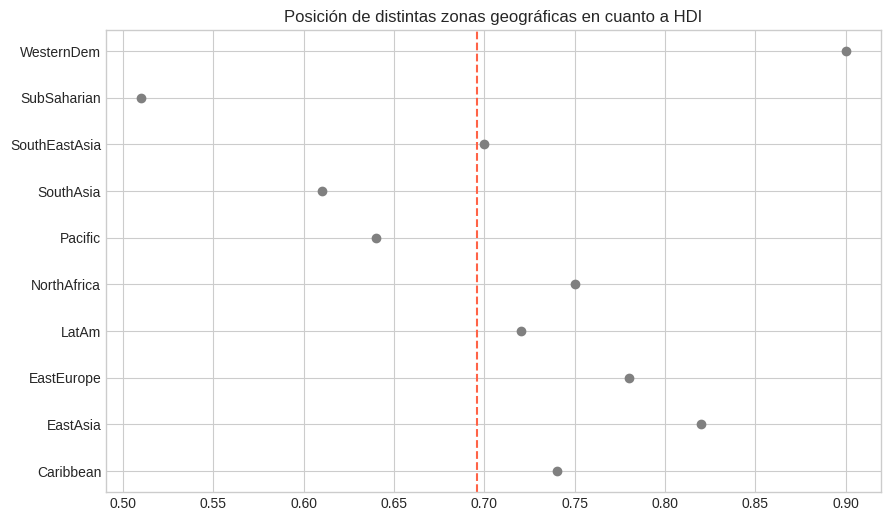

In [ ]:
plt.title('HDI por zonas geográficas')
plt.plot(group_mean.values, group_mean.index, 'o', color = 'grey')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--');

Nuestro gráfico aclara el hecho que, en promedio, las democracias avanzadas (Europa Occidental y Estados Unidos, Canadá y Australia) alcanzan niveles de desarrollo humano sobre el 0.90 mientras que regiones como África subsahariana y las Islas del pacífico tienen condiciones de vida más precarias e inestables.

Para clarificar aún más este punto agregaremos la media de la variable utilizando el método axvline de matplotlib, que inserta una línea vertical.

También agregaremos una línea vertical que señale la mitad de la escala de la variable, no su mediana. Así observaremos cuántos países alcanzan una situación deficiente.


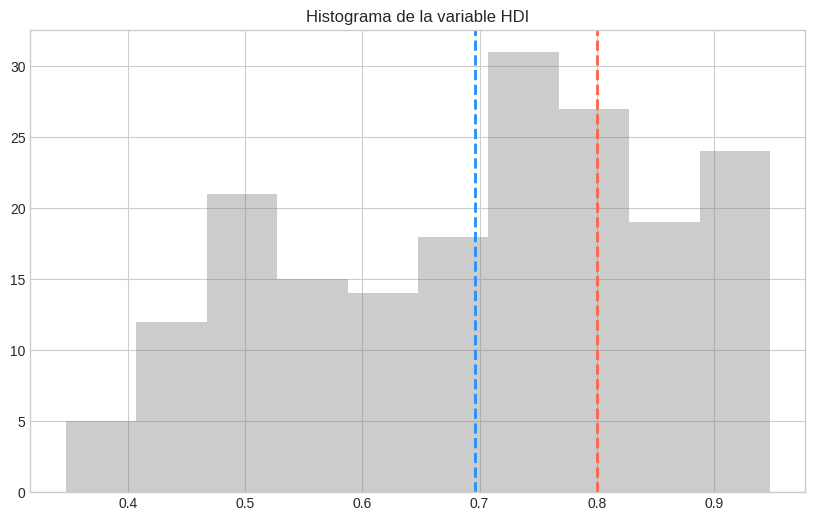

In [22]:
#guardemos la media en un objeto
hdi_mean = hdi_dropna.mean()

plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.axvline(hdi_mean, color='dodgerblue', linestyle='--', lw=2)
plt.axvline(0.8, color='tomato', linestyle='--', lw=2)
plt.title('Histograma de la variable HDI');

Nuestro argumento se mantiene sólido. Con base en la evidencia generada, existen dos grandes grupos de países: los desarrollados y los no desarrollados.

Cabe destacar que entre 0.50 y 0.70 encontramos a los países en vías de desarrollo.

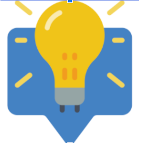
<strong><font color="green">Preguntas de proceso</font></strong>

Tomémonos un momento para reflexionar sobre lo revisado:
*   ¿Qué he aprendido hasta ahora?
*   ¿Hay algo que me está dificultando? Si es así, retrocede un poco y revísalo nuevamente antes de seguir avanzando

##<strong><font color="green">La distribución normal: caracterizando nuestras variables</font></strong>

Muchas mediciones empíricas tienden a responder a ciertas leyes respecto a su comportamiento. Estos se resumen en **variables aleatorias,** que definen los posibles valores asociados a una distribución probabilística.

La **distribución normal (o Gaussiana)** es una de las distribuciones más utilizadas para modelar eventos continuos. Fenómenos como la altura y peso de una población, así como los puntajes en pruebas de admisión a la Universidad o las notas de una clase se comportan de manera aproximadamente normal. Para el caso de una sola variable, depende de dos parámetros: la media (representada como $\mu$) y varianza (representada como $\sigma$). La media media indica el punto donde se concentra la mayoría de los datos, mientras que la desviación estándar señala qué tan concentrados están los datos en torno a la media.  Para analizar esto observaremos lo que ocurre con un conjunto de puntajes de estudiantes en algunas pruebas. Para ello utilizaremos un nuevo dataset, llamado **exams.csv**

In [24]:
examenes = pd.read_csv('exams.csv')
maths=examenes['math score']
examenes.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
print("La media es: ", round(np.mean(maths), 2))
print("La varianza es: ", round(np.std(maths), 2))

La media es:  66.4
La varianza es:  15.4


Con estos valores, simularemos una distribución normal. Previamente, necesitaremos importar librerías

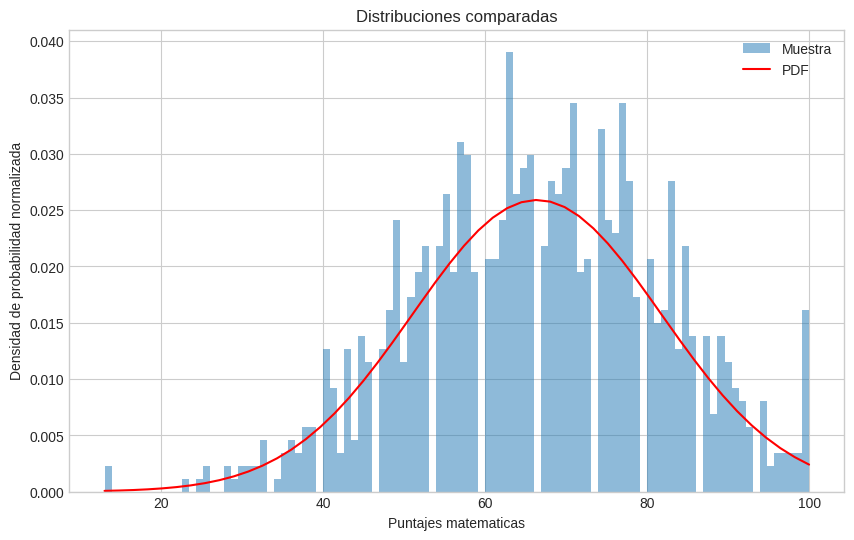

In [25]:
from scipy.stats import norm

#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.
mu=maths.mean()
sigma=maths.std()
minimo=maths.min()
maximo=maths.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x = np.linspace(minimo, maximo)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf = norm.pdf(x, loc=mu, scale=sigma)


# Construimos un histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas las áreas de las barras sea igual a 1, para que podamos representar las probabilidades
plt.hist(maths, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Puntajes matematicas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribuciones comparadas')
plt.legend()
plt.show()

##<strong><font color="green">Una variable no-normal y una posible transformación</font></strong>

Volvamos al índice de desarrollo humano, y generaremos ahora el histograma del Producto Interno Bruto (PIB) per cápita de los países. Para graficarlo, procedemos de manera similar a cómo lo hicimos con el Índice de Desarrollo Humano (IDH).

In [ ]:
gdp_dropna = df['gle_cgdpc'].dropna()

Text(0.5, 1.0, 'Histograma PIB')

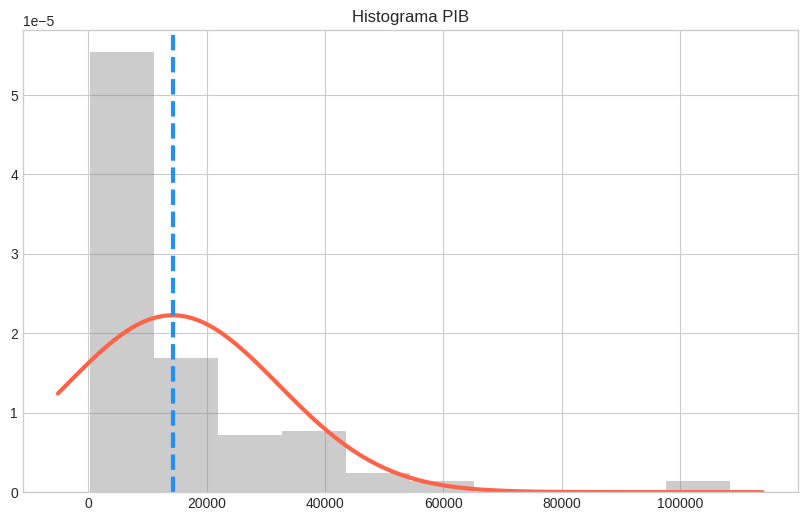

In [ ]:
plt.hist(gdp_dropna, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,gdp_dropna.mean(),gdp_dropna.std()),color='tomato', lw=3)
plt.axvline(gdp_dropna.mean(),
            color='dodgerblue',
            linestyle='--', lw=3)
plt.title("Histograma PIB")

Podemos observar que las observaciones no se corresponden con el modelo, pero podemos hacer una transformación de las variables para analizar si, una vez transformadas, se adaptan al modelo. Nuestra primera "transformación candidata" es el logaritmo:

In [ ]:
# Generamos la normalización del gdp mediante el logaritmo.
log_gdp = np.log(gdp_dropna)
print(round(log_gdp.mean() ,2))

8.85


Posteriormente grafiquemos el histograma y su curva.

Text(0.5, 1.0, 'Histograma log(PIB)')

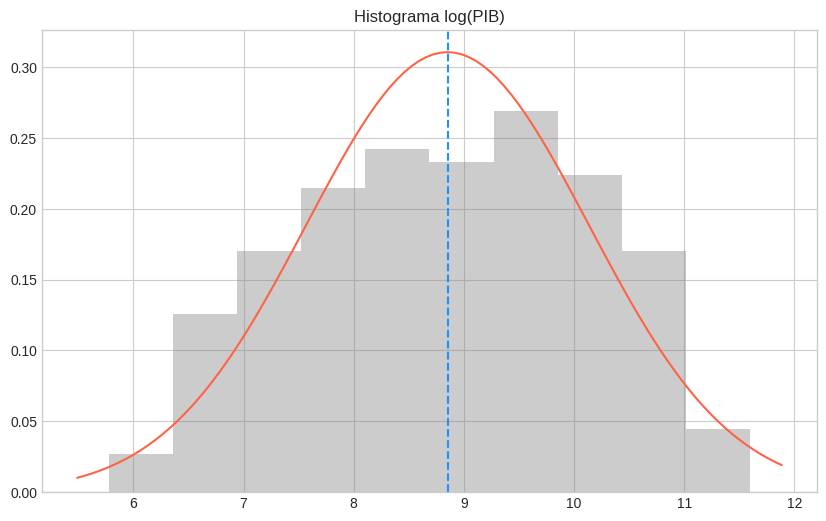

In [ ]:
plt.hist(log_gdp, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,log_gdp.mean(),log_gdp.std()),color='tomato')#notar la forma alternativa para la normal
plt.axvline(log_gdp.mean(),
            color='dodgerblue',
            linestyle='--')
plt.title("Histograma log(PIB)")

Efectivamente, al reescalar la variable, los nuevos puntajes generan un histograma aproximadamente normal.

El principal contrapunto de ocupar logaritmos para transformar variables, es el hecho que sus resultados son difíciles de implementar. Por lo general sirven para transformar data simétrica en una distribución más ajustada a lo normal o para mejorar la linealidad entre variable dependiente e independiente en un modelo de regresión. Sin embargo, se debe implementar con precaución, especialmente al momento de interpretar los resultados.

##<strong><font color="green">Una variante importante: La distribución normal estandarizada</font></strong>


Cuando la distribución normal tiene una media de 0 y una varianza de 1, se conoce como **distribución normal estandarizada.**. Dada su facilidad para ser interpretada, cabe resaltar sus características más importantes:

*  Es **unimodal,** lo que implica que tiene sólo un punto que es el más alto, donde se concentran la mayoría de los datos.
*  Es **simétrica,** dado que la mayoría de los datos gravitan alrededor de la media.

Mediante los componentes paramétricos de la distribución normal podemos calcular el porcentaje de datos que estará bajo la curva. Así:

*  Aproximadamente un 68% de los datos se encontrarán a una desviación o menos de la media, es decir en el intervalo $\left[\mu-\sigma,\mu+\sigma\right]$
*  Aproximadamente un 95% de los datos se encontrarán a dos desviaciones o menos de la media, es decir en el intervalo $\left[\mu-2\sigma,\mu+2\sigma\right]$
*  Aproximadamente un 99% de los datos se encontrarán a tres desviaciones o menos de la media, es decir en el intervalo $\left[\mu-3\sigma,\mu+3\sigma\right]$

### Puntajes Z

La información entregada por la distribución normal nos permite aproximar nuestro conocimiento respecto al comportamiento de la variable. También podemos utilizar esta información para analizar cómo una observación en específico se comporta respecto a la media. Para ello utilizamos los puntajes z con la formula que se detalla a continuación:

$$Z=\dfrac{x_i-\overline{x}}{\sigma}$$


El procedimiento para obtener el puntaje z de una observación implica:

* Obtener la media del vector donde proviene la observación.
* Restar la observación con la media.
* Dividir el resultado por la desviación estándar.

El resultado de la operación indica a cuántas desviaciones estándares se encuentra una observación respecto a la media.

####Ejemplo: ¿Cuál es el IDH de Chile?

Comencemos por separar la fila de Chile. Esto lo logramos mediante el código:


In [26]:
chile = df[df['cname'] == 'Chile']

Instruimos al DataFrame para seleccionar sólo la fila que satisfaga la condición df['cname'] == 'Chile']. Posteriormente podemos acceder a la columna específica:

In [27]:
chile['undp_hdi']

,undp_hdi
35,0.845


Observa que podemos obtenerlo en una sola linea de código. Por otra parte, obtendremos la media y la desviación estándar

In [28]:
hdi_chile = df[df['cname']=='Chile']['undp_hdi']

media=round(hdi_dropna.mean(),3)
desv=round(hdi_dropna.std(),3)
print(f'hdi Chile: {hdi_chile}')
print(f'media: {media}')
print(f'desviación: {desv}')

hdi Chile: 35    0.845
Name: undp_hdi, dtype: float64
media: 0.696
desviación: 0.155


Y así, calculamos:

In [29]:
z_chile=(hdi_chile-media)/desv
z_chile

,undp_hdi
35,0.961291


Observamos que Chile se posiciona a menos de una desviación estándar respecto al promedio mundial del índice de desarrollo humano.


##<strong><font color="green">Variables aleatorias discretas</font></strong>

Hasta ahora sabemos trabajar cuando las variables representan mediciones contínuas, pero en ocasiones nuestros objetivos a analizar presentan categorías y sus números son representaciones conceptuales.

En aquellas situaciones, nos debemos valer de las variables aleatorias discretas. las cuales permiten resumir el comportamiento de un fenómeno mediante el conteo (a diferencia de las variables aleatorias continuas que permiten resumir el comportamiento de un fenómeno mediante la medición).

La distribución de una variable aleatoria X generalmente se especifica mediante un listado de todos los posibles valores y una función de probabilidad de masa p(x).

###<strong><font color="green">Experimento de Bernoulli</font></strong>

Consideremos la siguiente situación: Ccmo investigadores nos preguntan por la estabilidad democrática a nivel mundial. Para esto emplearemos la variable gol_inst, que mide el tipo de régimen en cada una de las observaciones.

Nuestro objetivo es desarrollar una variable binaria, donde asignaremos la etiqueta 'Democracia' para todos aquellos casos que presenten alguna variante de democracia (régimen parlamentario, presidencial o semipresidencial), y 'No Democracia' para todos los casos que no presenten dicha gobernanza con participación y división de los poderes del Estado.

**numpy** ofrece el operador **np.where()**, que nos facilita la reconversión de valores en base a la satisfacción de un criterio. La sintaxis de np.where() consta de tres partes:

<center>

**np.where(condición, valor_positivo, valor_negativo)**

</center>


*  **condición** hace referencia a un criterio formalizado en alguna expresión booleana que evalúe en verdaderos o falsos.
*  **valor_positivo** es el valor que tomarán aquellos elementos que satisfagan la condición.
*  **valor_negativo** es el valor que tomarán aquellos elementos que no satisfagan la condición.

Sabemos que en la variable las democracias tienen un número asignado entre el 0 y el 2, y que las dictaduras tienen números entre el 3 y el 5. Para utilizar np.where, desarrollamos la condición booleana **df['gol_inst'] <= 2** para evaluar como 'Democracia' todos aquellos casos menores o iguales a 2 y 'No democracia' los demás.



In [ ]:
# Proporciones de cada tipo de gobierno en el dataset
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount

Democracia       0.65
No Democracia    0.35
Name: democracies, dtype: float64

In [ ]:
df['democracies'].value_counts()

Democracia       127
No Democracia     67
Name: democracies, dtype: int64

Observamos que el 65% de las observaciones son clasificadas como democracias. Si tomamos un país al azar de los registrados en el dataset, hay un 65% de probabilidad de que el país sea una variante del régimen democrático.

Para sustentar este enunciado, es necesario respaldarnos en las leyes estadísticas. ¿Cómo podemos hacerlo?

Sabemos que la probabilidad de suceso de un evento es P. Por tanto, su tasa de ausencia está definida como Q=(1-P).
La distribución Bernoulli (también llamada ensayo de Bernoulli) representa un caso individual donde se realiza un ensayo con $x\in\left[0,1\right]$. Para simplificar y analizar, asignamos el valor 1 a "éxito" y 0 a "fracaso"

Podemos solicitar los primeros momentos de un ensayo de Bernoulli en el módulo **scipy.stats** mediante la función **bernoulli.stats,** donde ingresando nuestra probabilidad obtenemos nuestra media y varianza.


In [ ]:
mu, sigma = stats.bernoulli.stats(.65)
print("La media del ensayo de Bernoulli es de: ", mu.round(2))
print("La varianza del ensayo de Bernoulli es de: ", sigma.round(2))
print("La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre :",
      round(mu - sigma, 2), round(mu + sigma, 2))

La media del ensayo de Bernoulli es de:  0.65
La varianza del ensayo de Bernoulli es de:  0.23
La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre : 0.42 0.88


###Distribución Binomial: Analizando una serie de ensayos de Bernoulli

La información generada por el ensayo de Bernoulli es útil cuando buscamos caracterizar un caso cualquiera en nuestra muestra. Resulta que es de más interés ver cómo se distribuiría la tasa de éxito o fracaso en una muestra finita. Para ello utilizamos la **distribución binomial.**

La distribución binomial da la probabilidad de observar m ocurrencias de x = 1 en un conjunto de N muestras que surgen de una distribución Bernoulli, donde la probabilidad de ocurrencia de x = 1 es p (o $\mu$).

Solicitemos los primeros momentos de la distribución binomial para la muestra de 194 países, con la probabilidad de 0.65 de ser democráticos. Mediante la función **binom** podemos generar un objeto que tendrá el método stats que devuelve la cantidad de países que deberían ser democracias.

In [30]:
prob_dem = stats.binom(len(df), 0.65)
mu, sigma = prob_dem.stats()
print("Con", len(df), "países y una probabilidad de .65, esperamos que", mu, " países tengan regímenes democráticos." )

Con 194 países y una probabilidad de .65, esperamos que 126.10000000000001  países tengan regímenes democráticos.


La distribución Binomial depende de dos parámetros: el tamaño muestral y la proporción estimada. Para entender mejor cómo la proporción estimada afecta a la distribución, consideremos el siguiente ejemplo.

Vamos a graficar las distribuciones empíricas de cuatro niveles de probabilidad (0.3, 0.6, 0.9, 0.95), manteniendo constante el tamaño muestral.

Observamos que en la medida que la proporción de casos va aumentando, nuestra curva de densidad se desplaza a lo largo del eje x, indicando mayores tasas de casos presentes en la muestra. Otro elemento a destacar es que, a medida que aumentamos la probabilidad, la curva tiende a disminuir su varianza.


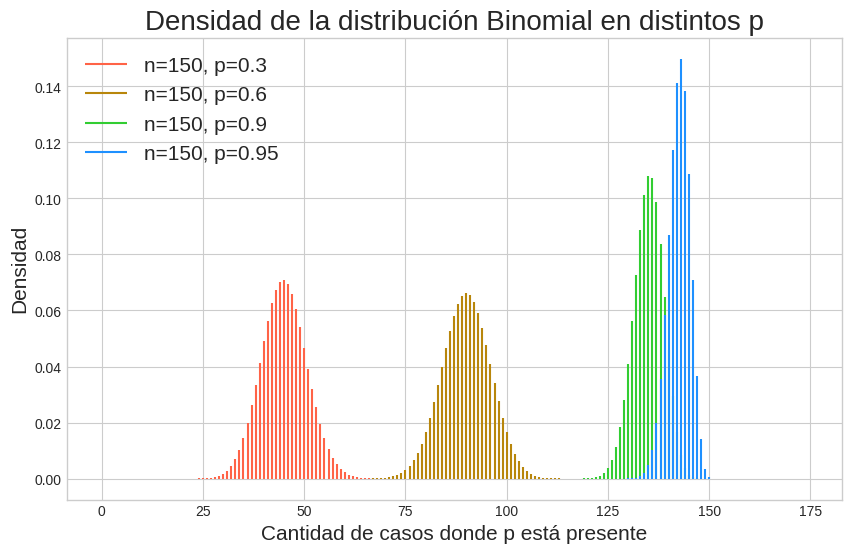

In [ ]:
# generamos una lista con cuatro colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]

# iniciamos un loop para índices y valores
for i, prob in enumerate([.3, .6,.9, .95]):
    # generamos un arreglo con numpy de 175
    x_axis= np.arange(175)
    # para cada valor de nuestro array graficamos la probabilidad
    plt.vlines(x_axis, 0, stats.binom(150, prob).pmf(x_axis),
               # y asignamos un color en específico
               colors=colors[i], label="n=150, p={}".format(prob))
plt.legend(loc=2, fontsize = 15)
plt.title("Densidad de la distribución Binomial en distintos p", size = 20)
plt.xlabel('Cantidad de casos donde p está presente', size = 15)
plt.ylabel('Densidad', size = 15);

### Sobre enumerate

Hay casos dónde estamos interesados en pasar por todos los elementos de un arreglo, pero deseamos pasar tanto su posición y elemento como parámetros.

enumerate permite contar la posición e identificar cada elemento de una lista en específico. Así podemos pasar dos argumentos cuando ejecutamos el loop, separados por coma.

En el código del gráfico establecemos que vamos a recorrer todos los valores i (que corresponden a la posición del elemento en la lista) y prob (que corresponde al valor del elemento en la lista).

i se pasa como un localizador de cada elemento en colors[i], mientras que prob se pasa como argumento en stats.binom(150, prob).


¿Qué pasa cuando mantenemos nuestra probabilidad fija condicionada al tamaño muestral?

Grafiquemos el caso donde mantenemos nuestra probabilidad en .65, y vamos aumentando nuestra muestra de 50 hasta 200. Mientras que en valores muestrales pequeños la curva de densidad se muestra con una menor varianza, la curva se aproxima a la campana gaussiana en la medida que aumentamos su tamaño.


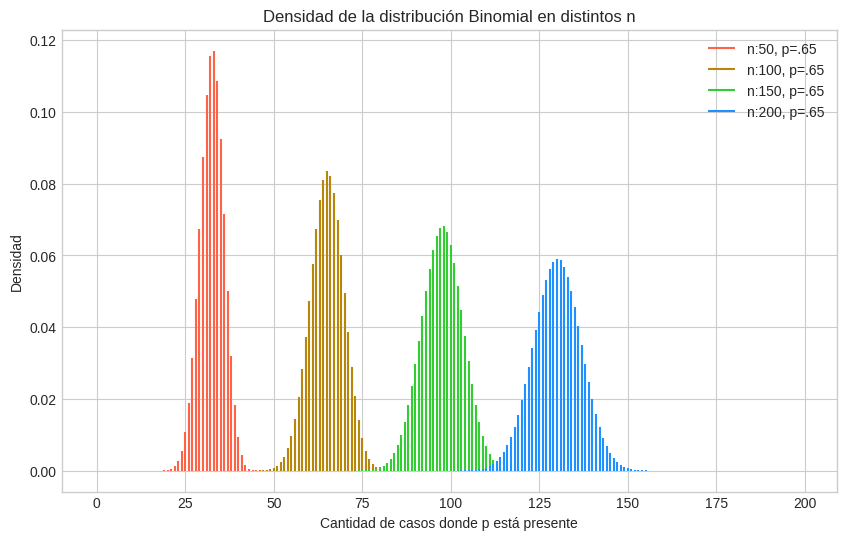

In [ ]:
# generamos una lista de colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]

# iniciamos un loop para índices y valores
for i, n_size in enumerate([50, 100, 150, 200]):
    # generamos un arreglo con numpy de 200
    x_axis= np.arange(200)
    # para cada valor de nuestro array graficamos la probabilidad condicional al tamaño
    plt.vlines(x_axis, 0, stats.binom(n_size, .65).pmf(x_axis), colors=colors[i], label=r'n:{0}, p=.65'.format(n_size))
plt.legend()
plt.title("Densidad de la distribución Binomial en distintos n")
plt.xlabel("Cantidad de casos donde p está presente")
plt.ylabel('Densidad');

##<strong><font color="green">Reflexiona</font></strong>

*  ¿Cómo se comprueba que una variable es normal o no-normal?
*  ¿Qué es el puntaje Z? ¿Cuál es el procedimiento para obtener el puntaje z de una observación?
*  ¿Para qué utilizamos el Ensayo de Bernoulli? ¿En qué se relaciona con la distribución binomial?


##<strong><font color="green">Referencias</font></strong>

Para profundizar sobre las variables aleatorias y sus atributos:

* Caffo, B. 2015. Statistical Inference for Data Science:

    * Ch. 6: Some common distributions.
    * Ch. 7: Asymptopia

* Dodge, Y. 2006. The Concise Encyclopedia of Statistic:

    * Random Variable (página 446)

Para tener una exposición rigurosa a los aspectos formales y asintóticos de las variables aleatorias:

*  Casella, G; Berger, R. 2002. Statistical Inference:
    * Ch 3: Common families of distributions


In [31]:
df = pd.read_csv('baby.csv')
df.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [33]:
df.describe().round(2)

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.00,1174.00,1174.00,1174.00,1174.00,1174.00
mean,587.50,119.46,279.10,27.23,64.05,128.48
std,339.05,18.33,16.01,5.82,2.53,20.73
min,1.00,55.00,148.00,15.00,53.00,87.00
25%,294.25,108.00,272.00,23.00,62.00,114.25
50%,587.50,120.00,280.00,26.00,64.00,125.00
75%,880.75,131.00,288.00,31.00,66.00,139.00
max,1174.00,176.00,353.00,45.00,72.00,250.00


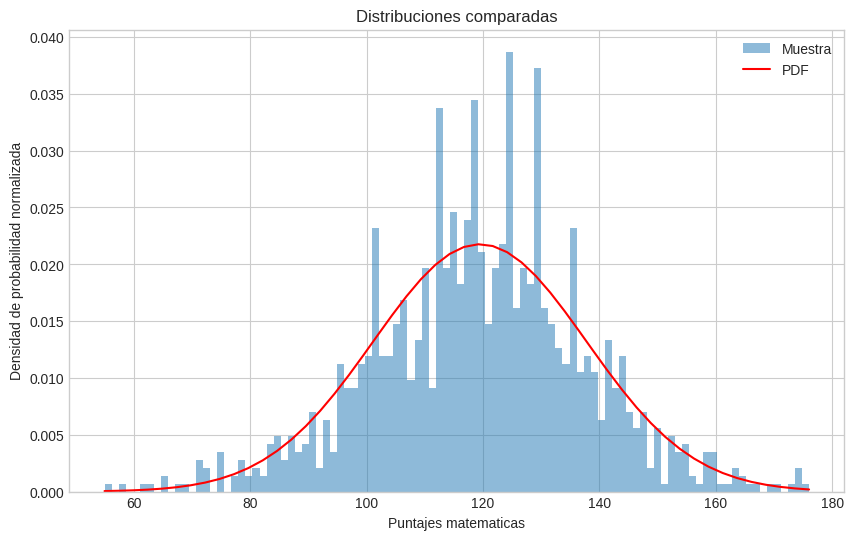

In [34]:
peso = df['Birth.Weight'].dropna()

#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.
mu=peso.mean()
sigma=peso.std()
minimo=peso.min()
maximo=peso.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x = np.linspace(minimo, maximo)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf = norm.pdf(x, loc=mu, scale=sigma)


# Construimos un histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas las áreas de las barras sea igual a 1, para que podamos representar las probabilidades
plt.hist(peso, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Puntajes matematicas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribuciones comparadas')
plt.legend()
plt.show()

In [36]:
from scipy.stats import percentileofscore

peso_prueba = [90,110,130,150,170]

for i in peso_prueba:
  peso_real = percentileofscore(peso,i)
  peso_teorico = 100*norm.cdf(i, loc = mu, scale=sigma)
  print(f'El percentil real para {i} es {peso_real} y el teorico es {peso_teorico}')

El percentil real para 90 es 5.664395229982964 y el teorico es 5.397725633524767
El percentil real para 110 es 28.066439522998294 y el teorico es 30.283334045462823
El percentil real para 130 es 73.29642248722317 y el teorico es 71.73265405260244
El percentil real para 150 es 95.61328790459966 y el teorico es 95.21536810526018
El percentil real para 170 es 99.57410562180578 y el teorico es 99.70858760684239


In [ ]:
separar en dos df fumadoras y no_fumadoras

In [ ]:
datos = df['Maternal.Smoker'].dropna()
fuma = np.where(datos,1,0)

